In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pyvista as pv
import imageio

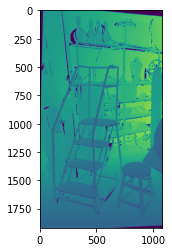

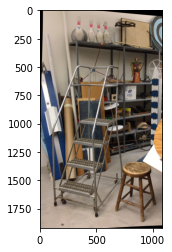

In [37]:
img_path = "/home/julian/data/middlebury/all/data/ladder1/im0.png"
dispm_path = "/home/julian/data/middlebury/all/data/ladder1/disp0.pfm"
f = 1733.68
cam = np.array([[f, 0, 819.72], [0, f, 957.55], [0, 0, 1]])
baseline=221.13
doffs=0

from pypfm import PFMLoader
loader = PFMLoader(color=False, compress=False)
pfm = loader.load_pfm(dispm_path)

for y in range(pfm.shape[0]):
    for x in range(pfm.shape[1]):
        disp = pfm[y,x]
        Z = baseline * f / (disp + doffs)
        pfm[y,x] = Z

dm = np.flip(pfm,axis=0)

im = imageio.imread(img_path)
im = np.asarray(im)

plt.figure()
plt.imshow(dm,origin="upper")

plt.figure()
plt.imshow(im)


In [38]:
pts = []
invK = la.inv(cam)
for y in range(dm.shape[0]):
    for x in range(dm.shape[1]):
        dist = dm[y,x]
        pt = dist * (invK @ [x,y,1])
        pts.append(pt)

pts = np.array(pts)

In [39]:
#mesh['colors'] = my_rgb_array
#mesh.plot(scalars='colors', rgb=True, notebook=False)

mesh = pv.PolyData(pts)
mesh['colors'] = np.reshape(im,(-1,3))

#mesh.plot(scalars='colors',rgb=True, render_points_as_spheres=True,eye_dome_lighting=True,notebook=False)
mesh.plot(scalars='colors',rgb=True,notebook=False)

ValueError: Number of scalars (6220800) must match either the number of points (2072520) or the number of cells (2072520).

In [42]:
im.shape

(1920, 1080, 3)

In [ ]:

K = np.array([[10000.0,0,1],[0,1000,1],[0,0,1]])
K

array([[1.e+04, 0.e+00, 1.e+00],
       [0.e+00, 1.e+03, 1.e+00],
       [0.e+00, 0.e+00, 1.e+00]])

In [ ]:
dm = depths[0]
Kinv = la.inv(K)
pts = []
for y in range(dm.shape[0]):
    for x in range(dm.shape[1]):
        point = Kinv @ [x,y,1]
        point = dm[y,x] * point
        pts.append(point)

pts = np.array(pts)

In [ ]:
import pyvista as pv

cloud = pv.PolyData(pts)
cloud.plot(render_points_as_spheres=True,eye_dome_lighting=True,notebook=False)